In [9]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re


sys.path.insert(0, 'C:/Users/ragna/Documents/Ragnar/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC


In [10]:
keys = ['probs_1', 'probs_2', 'sizes_1','sizes_2', 'n', 'm', 'noise']
params_kernel = {}
data_auc = {}
data = {}


# RW


In [21]:
RW = readfoldertopanda("../data/SBMOnlyRandomLabel/RW")
RW.columns

Index(['kernel', 'alpha', 'noise1', 'noise2', 'normalize', 'probs_1',
       'sizes_1', 'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'type', 'discount', 'sinkhorn', 'r',
       'normalize_adj', 'row_normalize_adj', 'noise'],
      dtype='object')

In [24]:
np.unique(RW['noise'])

array([0.005, 0.01 , 0.02 , ...,   nan,   nan,   nan])

In [33]:
data['RW'] = RW
data['RW'] = data['RW'].loc[(data['RW']['N'] == 1000) | (data['RW']['N'] == 500)]
data['RW'].loc[data['RW']['r'] == 15, 'noise'] = data['RW'].loc[data['RW']['r'] == 15, 'noise2']

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


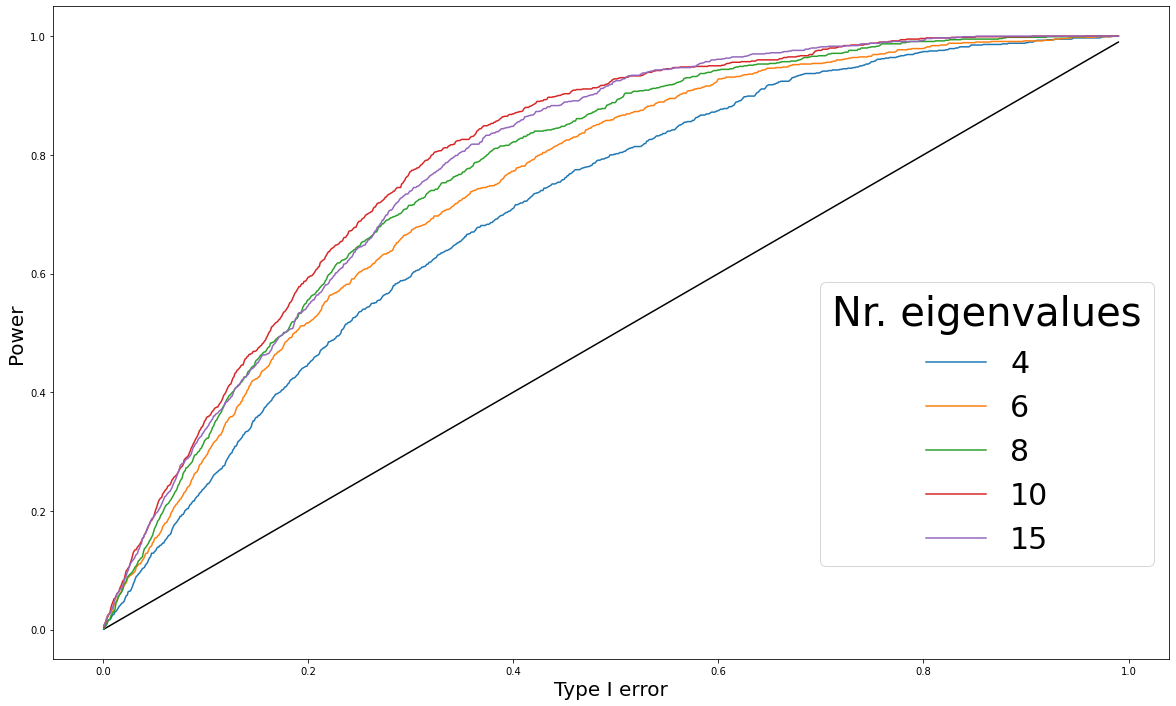

In [34]:

params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'noise':0.07,
                'discount':0.01
                #'type':'ARKU_plus'
                }


plotVaryingBGDEG(df = data['RW'].loc[(data['RW']['N'] == 1000)], param_vary_name = "r", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. eigenvalues')

In [35]:
params_kernel['RW'] = ['normalize', 'r', 'discount', 'type']
data_auc['RW'] = findAUC(keys = keys, params = params_kernel['RW'], stats = ['MMD_b', 'MMD_u'], df = data['RW'].loc[(data['RW']['N'] == 1000)] )

# WL

In [36]:
data['WL'] = readfoldertopanda("../data/SBMOnlyRandomLabel/WLsubtree")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
data['WL'] = data['WL'].loc[data['WL']['N'] == 3000]
data['WL'].columns

Index(['kernel', 'alpha', 'noise1', 'noise2', 'normalize', 'probs_1',
       'sizes_1', 'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'nitr', 'with_labels', 'sinkhorn', 'noise', 'wl_itr'],
      dtype='object')

In [ ]:
np.unique(data['WL']['noise'])

array([0.07])

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


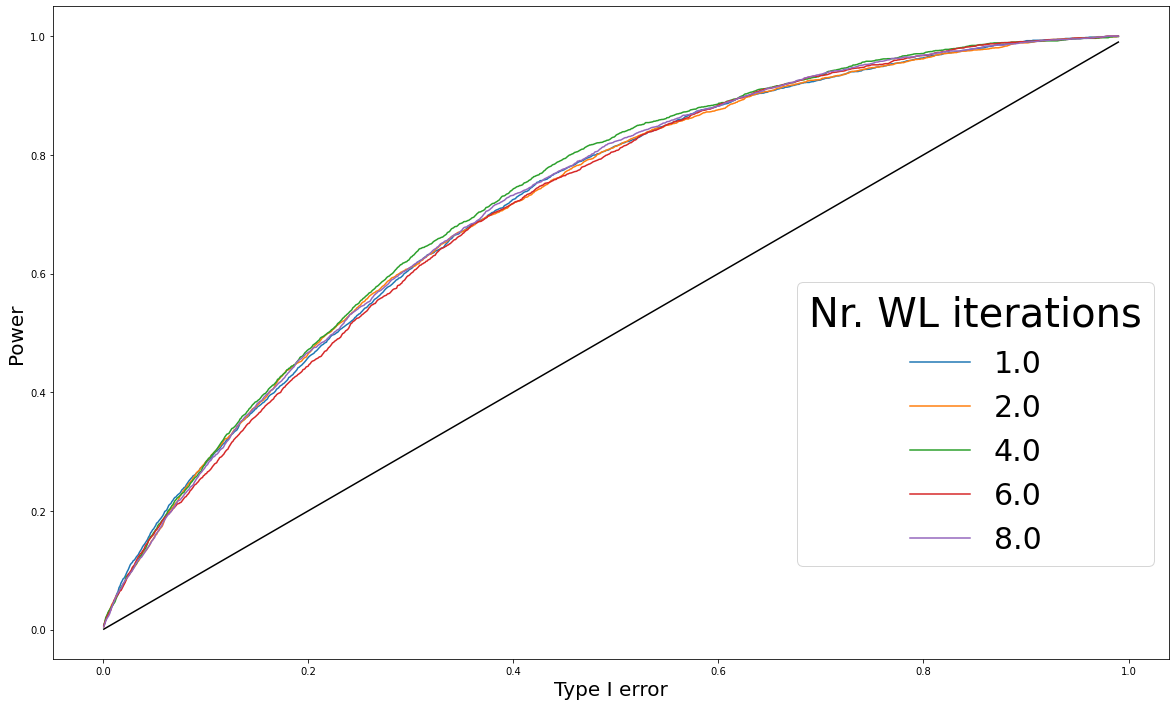

In [37]:
params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'noise':0.07
                }

plotVaryingBGDEG(df = data['WL'].copy(), param_vary_name = "nitr", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. WL iterations')


In [38]:
params_kernel['WL'] = ['nitr', 'normalize']
data_auc['WL'] = findAUC(keys = keys, params = params_kernel['WL'], stats = ['MMD_b', 'MMD_u'], df = data['WL'] )

# SP

c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


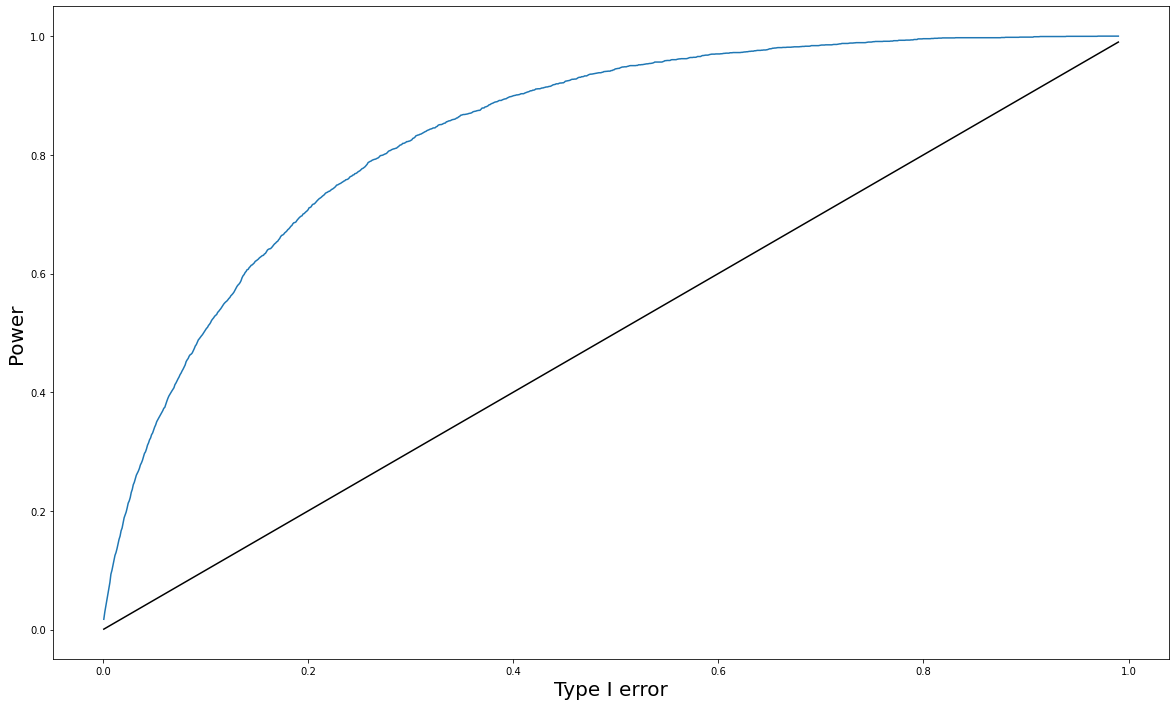

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,NaN,0,0.918657,0.918657
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",20,20,NaN,0,0.640532,0.640532
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,0.958080,0.958080
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,0.831058,0.831058
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",80,80,NaN,0,0.886376,0.886376


In [39]:

data['SP'] = readfoldertopanda("../data/SBMOnlyRandomLabel/SP")
data['SP'] .columns
data['SP'] = data['SP'].loc[data['SP']['N'] == 3000]


params_fixed = {'n':60,
                'm':60,
                'noise':0.07
                }


plotVaryingBGDEG(df = data['SP'] .copy(), param_vary_name = 'normalize', params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Normalized', set_legend = False)

params_kernel['SP'] = [ 'normalize']
data_auc['SP']  = findAUC(keys = keys, params = params_kernel['SP'], stats = ['MMD_b', 'MMD_u'], df = data['SP'] )
data_auc['SP'].head()


# WWL

In [40]:
data['WWL'] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/WWL")
data['WWL'] = data['WWL'].loc[data['WWL']['N'] == 3000]
print(data['WWL'].columns)

Index(['kernel', 'alpha', 'noise1', 'noise2', 'normalize', 'probs_1',
       'sizes_1', 'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'nitr', 'with_labels', 'discount', 'sinkhorn',
       'noise'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


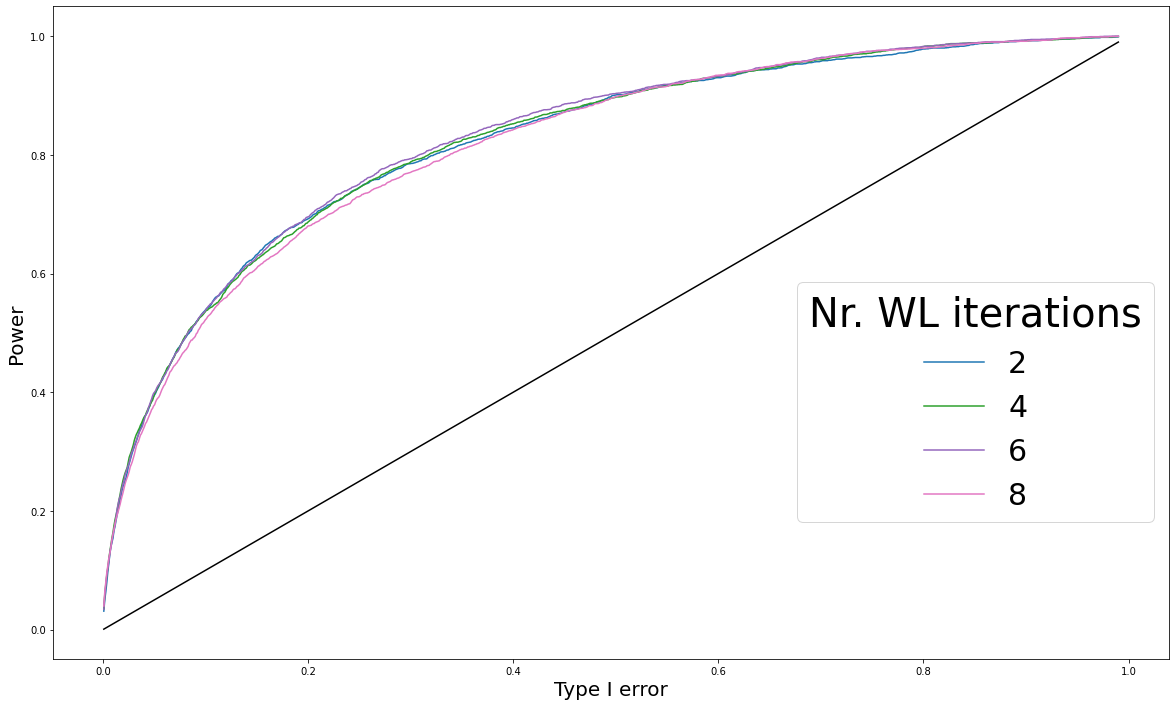

In [41]:


params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'noise':0.07,
                #'nitr':2
                'discount':0.1
                }


plotVaryingBGDEG(df = data['WWL'] .copy(), param_vary_name = 'nitr', params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. WL iterations')



In [ ]:

params_kernel['WWL'] = [ 'normalize', 'nitr', 'discount', 'sinkhorn']
data_auc['WWL']  = findAUC(keys = keys, params = params_kernel['WWL'], stats = ['MMD_b', 'MMD_u'], df = data['WWL'] )
data_auc['WWL'].head()

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,nitr,discount,sinkhorn,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,2,0.1,False,0.989000,0.989000
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,2,0.1,False,0.813010,0.813010
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,4,0.1,False,0.989000,0.989000
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,4,0.1,False,0.814386,0.814386
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,6,0.1,False,0.989000,0.989000


# Propagation

In [43]:
data['PROP'] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/PROP")
data['PROP'] = data['PROP'].loc[data['PROP']['N'] == 3000]
print(data['PROP'].columns)

Index(['kernel', 'alpha', 'noise1', 'noise2', 'normalize', 'probs_1',
       'sizes_1', 'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'w', 'tmax', 'M', 'sinkhorn', 'noise'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


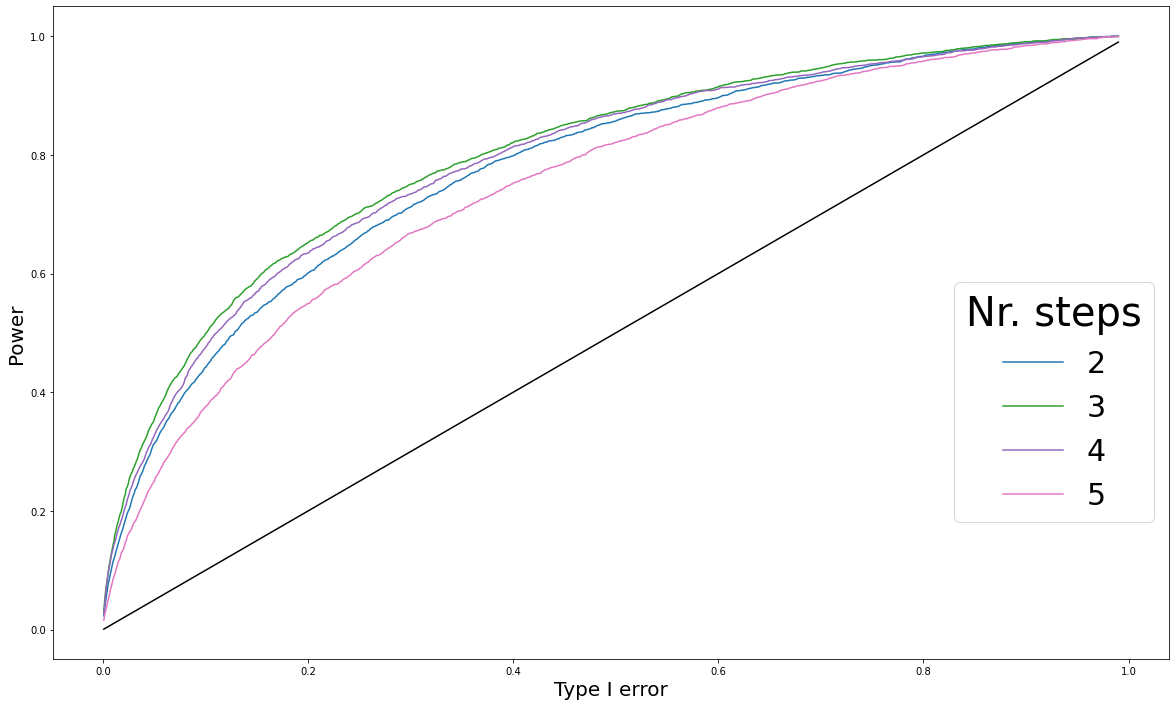

In [ ]:
# Propagation

params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'noise':0.07,
                'M':'H',
                'w':0.01
                #'tmax':4
                }


plotVaryingBGDEG(df = data['PROP'] .copy(), param_vary_name = 'tmax', params_fixed = params_fixed, mmd_stat = "MMD_u",color_name = "tab10", disp_title=False, legend_title= 'Nr. steps')



In [ ]:
params_kernel['PROP'] = [ 'normalize', 'w', 'M', 'tmax']
data_auc['PROP']  = findAUC(keys = keys, params = params_kernel['PROP'], stats = ['MMD_b', 'MMD_u'], df = data['PROP'] )
data_auc['PROP'].head()

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,w,M,tmax,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,0.0001,H,2,0.926043,0.926043
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,0.0001,H,2,0.768729,0.768725
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,0.0010,H,2,0.927537,0.927531
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,0.0010,H,2,0.769144,0.769151
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,0.0100,H,2,0.919156,0.919156


# Pyramid

In [42]:
data['PYRAMID'] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/PYRAMID")
data['PYRAMID'] = data['PYRAMID'].loc[data['PYRAMID']['N'] == 3000]
print(data['PYRAMID'].columns)

Index(['kernel', 'alpha', 'noise1', 'noise2', 'normalize', 'probs_1',
       'sizes_1', 'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'L', 'dim', 'sinkhorn', 'noise'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


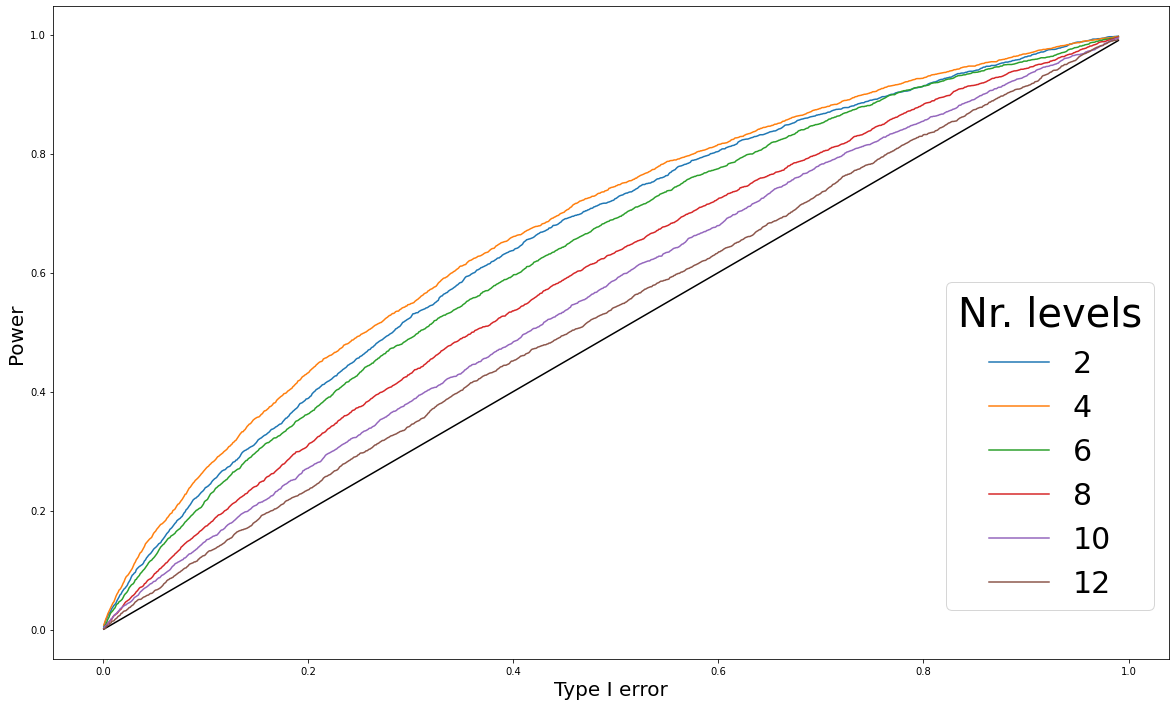

In [ ]:



params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'noise':0.07,
                'dim':3,
                #'L':4
                }


plotVaryingBGDEG(df = data['PYRAMID'] .copy(), param_vary_name = 'L', params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. levels')


In [ ]:
params_kernel['PYRAMID'] = ['normalize', 'dim', 'L']
data_auc['PYRAMID']  = findAUC(keys = keys, params = params_kernel['PYRAMID'], stats = ['MMD_b', 'MMD_u'], df = data['PYRAMID'] )
data_auc['PYRAMID'].head()

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,dim,L,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,2,10,0.611557,0.611557
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,2,10,0.548491,0.548491
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,3,10,0.631690,0.631690
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,3,10,0.553131,0.553131
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,4,10,0.647171,0.647171


# WLOA

Index(['kernel', 'alpha', 'noise1', 'noise2', 'normalize', 'probs_1',
       'sizes_1', 'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'nitr', 'with_labels', 'sinkhorn', 'noise'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


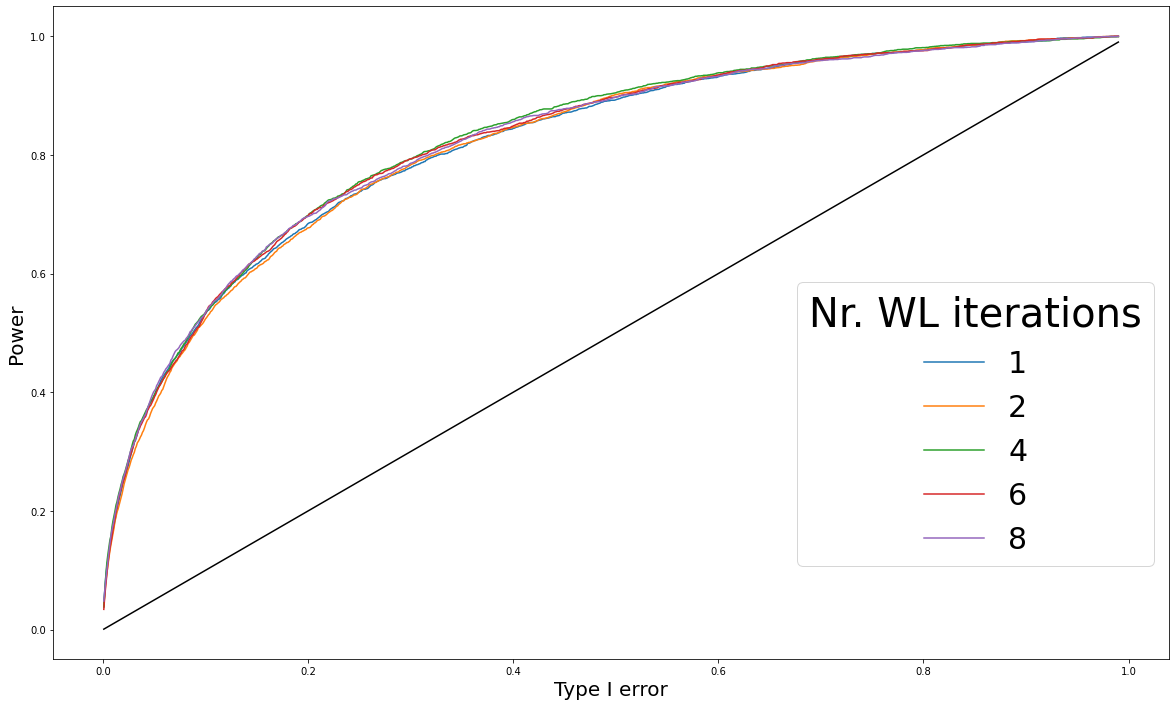

In [44]:

data['WLOA'] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/WLOA")
data['WLOA'] = data['WLOA'].loc[data['WLOA']['N'] == 3000]

print(data['WLOA'].columns)


params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'noise':0.07
                }


plotVaryingBGDEG(df = data['WLOA'] .copy(), param_vary_name = 'nitr', params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. WL iterations')



In [ ]:
params_kernel['WLOA'] = ['normalize', 'nitr']
data_auc['WLOA']  = findAUC(keys = keys, params = params_kernel['WLOA'], stats = ['MMD_b', 'MMD_u'], df = data['WLOA'] )
data_auc['WLOA'].head()

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,nitr,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,1,0.810857,0.810865
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,2,0.810100,0.810093
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,4,0.818263,0.818283
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,6,0.814810,0.814803
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,8,0.814705,0.814719


# VH

Index(['kernel', 'alpha', 'noise', 'normalize', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'sinkhorn'],
      dtype='object')


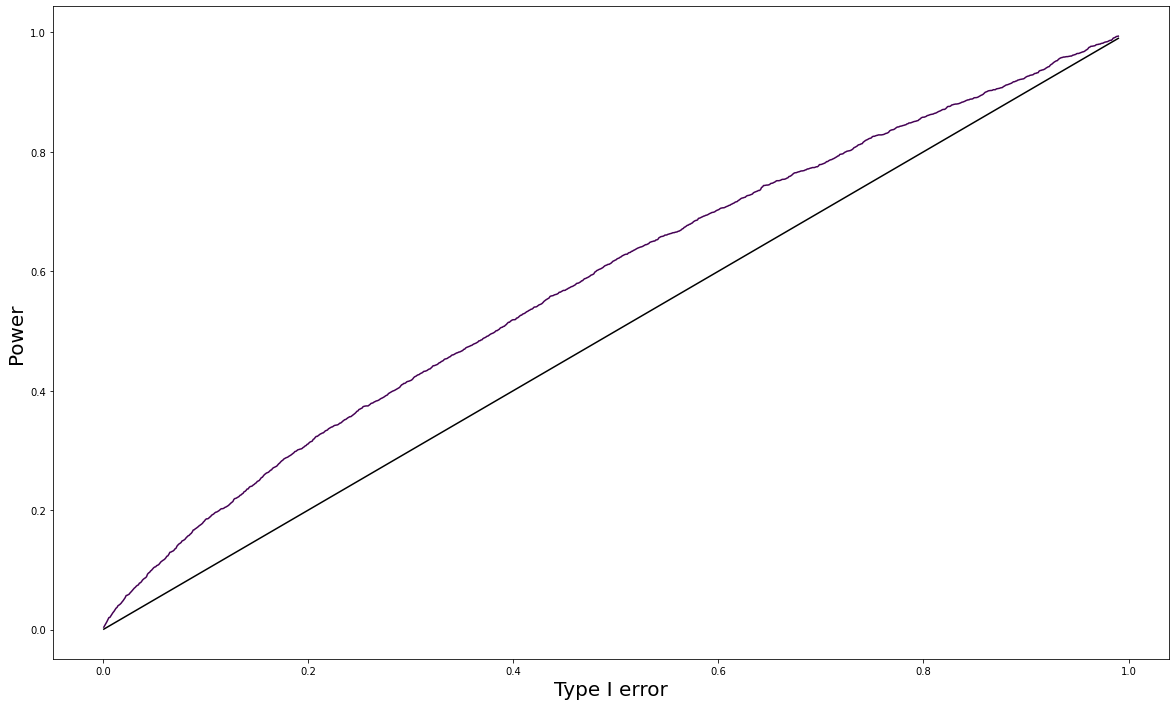

In [45]:
data['VH'] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/VH")
data['VH'] = data['VH'].loc[data['VH']['N'] == 3000]
print(data['VH'].columns)


params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'noise':0.07
                }


plotVaryingBGDEG(df = data['VH'] .copy(), param_vary_name = '', params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "viridis", disp_title=False, legend_title= 'Normalized', set_legend = False)

In [ ]:
params_kernel['VH'] = ['normalize']
data_auc['VH']  = findAUC(keys = keys, params = params_kernel['VH'], stats = ['MMD_b', 'MMD_u'], df = data['VH'] )
data_auc['VH'].head()

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,0.573015,0.573089


# ODD

Index(['kernel', 'alpha', 'noise', 'normalize', 'probs_1', 'sizes_1',
       'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'dagh', 'sinkhorn'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


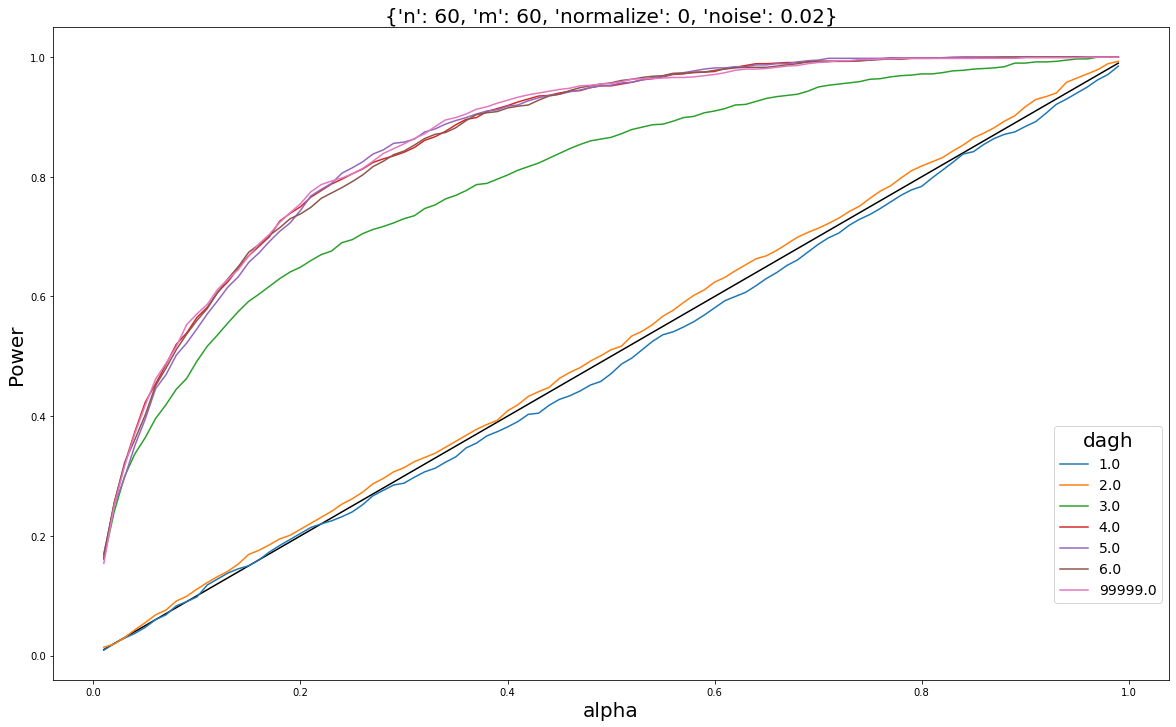

In [ ]:
# name = 'ODD'
# data[name] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/{name}")
# print(data[name].columns)


# params_fixed = {'n':60,
#                 'm':60,
#                 'normalize':0,
#                 'noise':0.02
#                 }


# plotVaryingBGDEG(df = data[name] .copy(), param_vary_name = 'dagh', params_fixed = params_fixed, mmd_stat = "MMD_b", color_name = "tab10")


In [ ]:
# params_kernel[name] = ['normalize', 'dagh']
# data_auc[name]  = findAUC(keys = keys, params = params_kernel[name], stats = ['MMD_b', 'MMD_u'], df = data[name] )
# data_auc[name].head()

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,dagh,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,1.0,0.490837,0.490837
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,2.0,0.488827,0.488827
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,3.0,0.587933,0.587933
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,5.0,0.572360,0.572360
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",100,100,0.005,0,NaN,0.573263,0.573263


# DK

Index(['kernel', 'alpha', 'noise1', 'noise2', 'normalize', 'probs_1',
       'sizes_1', 'label_pmf_1', 'probs_2', 'sizes_2', 'label_pmf_2', 'n', 'm',
       'timestap', 'B', 'N', 'run_time', 'MMD_b', 'MMD_b_distfree', 'MMD_u',
       'MMD_u_distfree', 'with_labels', 'type', 'sinkhorn', 'noise', 'nitr'],
      dtype='object')


c:\Users\ragna\Documents\Ragnar\Code\MMDGraph\.venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


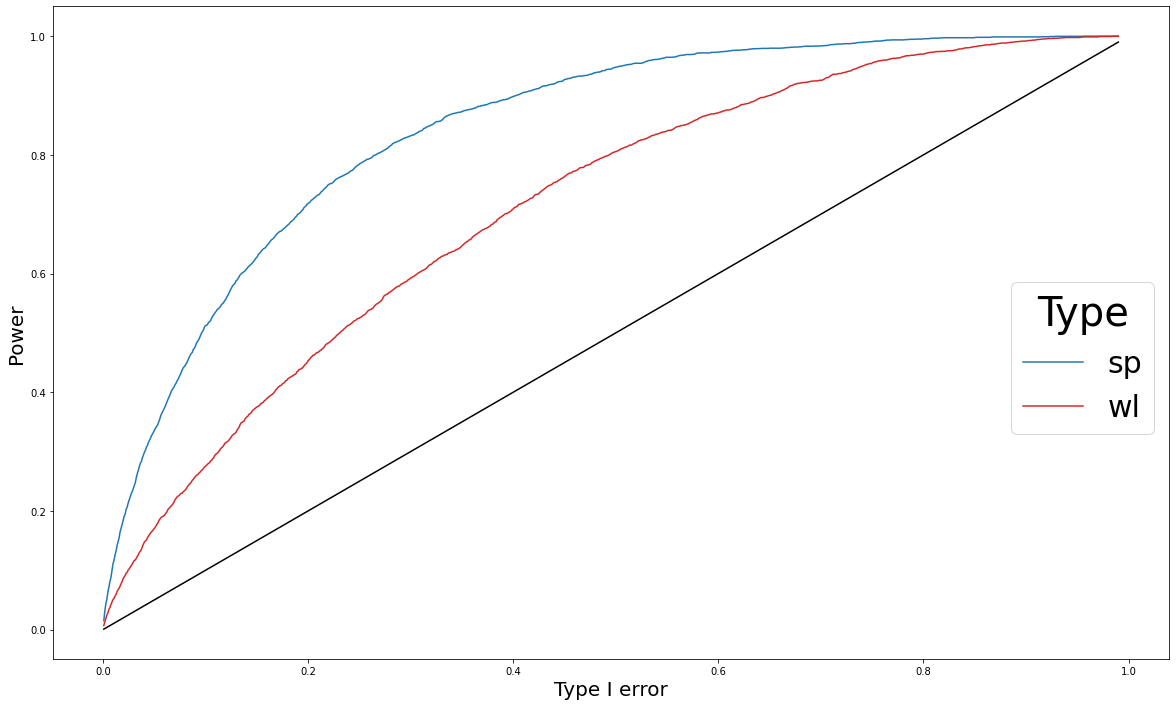

In [82]:

data['DK'] = readfoldertopanda(f"../data/SBMOnlyRandomLabel/DK")
data['DK'] = data['DK'].loc[data['DK']['N'] == 3000]
print(data['DK'].columns)


params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'noise':0.07
                }


plotVaryingBGDEG(df = data['DK'] .copy(), param_vary_name = 'type', params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Type')


In [ ]:
params_kernel['DK'] = ['normalize', 'nitr', 'type']

data_auc['DK']  = findAUC(keys = keys, params = params_kernel['DK'], stats = ['MMD_b', 'MMD_u'], df = data['DK'] )
data_auc['DK'].head()

,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,nitr,type,MMD_b_auc,MMD_u_auc
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,4.0,wl,0.922727,0.922732
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.02,0,NaN,sp,0.949057,0.949057
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,NaN,sp,0.834090,0.834090
0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,4.0,wl,0.703739,0.703737


# Comparing all with best params

In [141]:

key_pair = pd.DataFrame({'n':60,
                'm':60,
                'noise':0.07,
                'probs_1':'[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0.07 0.2 ]]', 
                'probs_2':'[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0.07 0.2 ]]', 
                'sizes_1':'[30, 20, 25]',
                'sizes_2':'[30, 20, 25]',},
                 index = [0])

stat = 'MMD_u_auc'
stat_plot = 'MMD_u'

best = []
best_auc = dict()

for k,v in data.items():
    print(k)

    k_data_max = data_auc[k].reset_index().merge(key_pair, on = keys)
    k_data_max = k_data_max[k_data_max.groupby(keys)[stat].transform(max) == k_data_max[stat]].iloc[[0]]
    best_auc[k] = k_data_max
    tmp_data = v.reset_index().merge(k_data_max, on = keys + params_kernel[k])
    tmp_data['kernel_name'] = k
    best.append(tmp_data)


WL
RW
SP
WWL
PROP
PYRAMID
WLOA
VH
DK


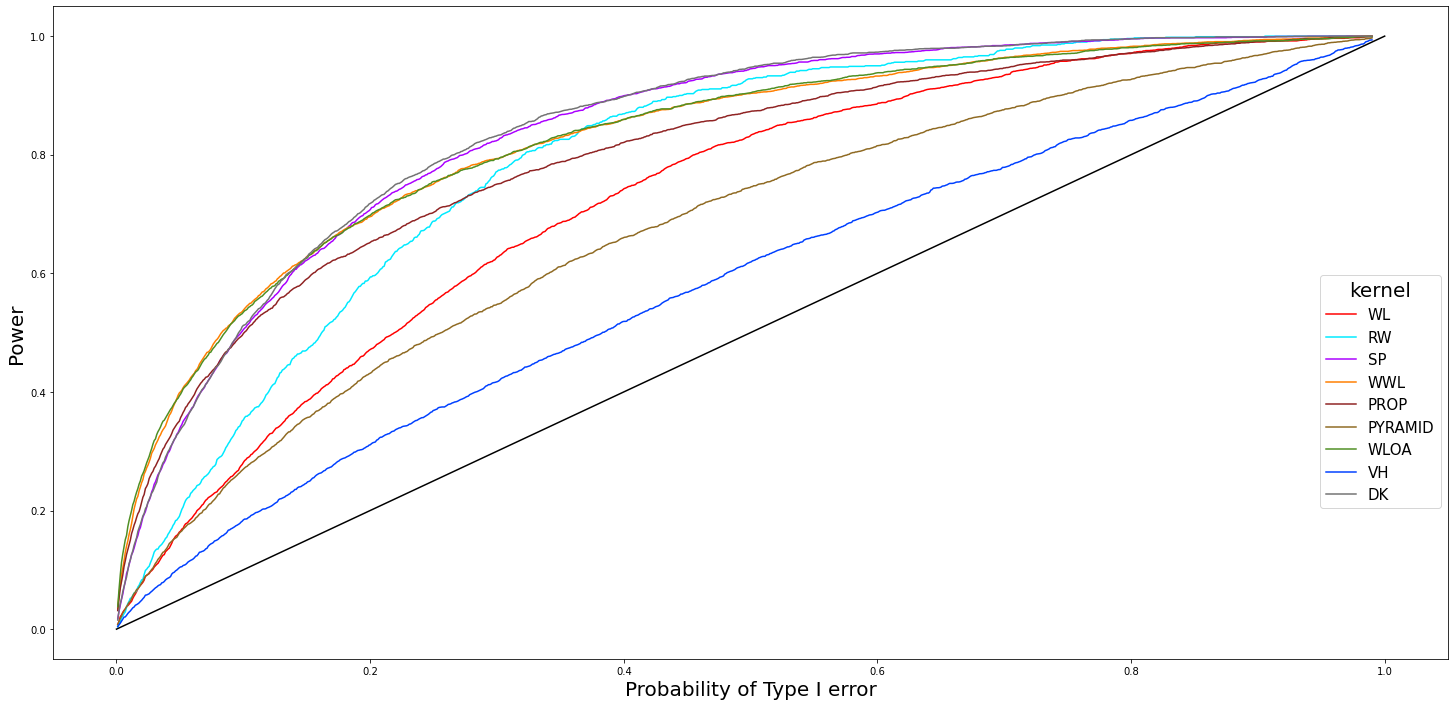

In [143]:
_, ax = plt.subplots(figsize = (25,12))


label = []
#icefire
#cmap = get_cmap(sns.color_palette("viridis", as_cmap=True)) # type: matplotlib.colors.ListedColormap
colors = ['#FF0000',  '#00EAFF', '#AA00FF', '#FF7F00', '#8F2323', '#8F6A23', '#4F8F23', '#0040FF', '#737373', '#23628F']# cmap.colors[::int(len(cmap.colors)/(7+1))]  # type: list

for i,row in enumerate(best):


    ax.plot(row['alpha'], row[stat_plot], color =colors[i], label=str(row['kernel_name'].iloc[0]))
    label.append(str(row['kernel_name'].iloc[0]))

ax.plot([0,1], [0,1], color = 'black')
# ax.plot(graph_stat['alpha'], graph_stat['average_degree'], color =colors[i+1], label='average_degree')
# label.append('average_degree')



h, l = ax.get_legend_handles_labels()

ax.legend(handles=h, labels=label, 
        handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)}, title = 'kernel', bbox_to_anchor=(1, 0.6), fontsize = 15, title_fontsize=20)

ax.set_xlabel('Probability of Type I error', fontsize = 20)
ax.set_ylabel('Power', fontsize = 20)
# ax.set_title(f'Number of samples = {key_pair["n"].iloc[0]}, Noise = {key_pair["noise"].iloc[0]}', fontsize = 20)



plt.show()

In [131]:
best_auc['PROP']

,index,probs_1,probs_2,sizes_1,sizes_2,n,m,noise,normalize,w,M,tmax,MMD_b_auc,MMD_u_auc
5,0,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,[[0.15 0.05 0.02]\n [0.05 0.25 0.07]\n [0.02 0...,"[30, 20, 25]","[30, 20, 25]",60,60,0.07,0,0.01,H,3,0.791753,0.791757


# Power

In [74]:
WL_power = data['WL'].loc[(data['WL']['nitr'] == 4) ]
WLOA_power = data['WLOA'].loc[data['WLOA']['nitr'] == 4]
SP_power = data['SP'].loc[(data['SP']['with_labels'] == 1) & ((data['SP']['noise'] == 0.07) | (data['SP']['noise1'] == 0.05))]
WWL_power = data['WWL'].loc[(data['WWL']['nitr'] == 4) & (data['WWL']['discount'] == 0.1) & ((data['WWL']['noise'] == 0.07) | (data['WWL']['noise1'] == 0.05))]
PROP_power = data['PROP'].loc[(data['PROP']['tmax'] == 3) & (data['PROP']['w'] == 0.01) & ((data['PROP']['noise'] == 0.07) | (data['PROP']['noise1'] == 0.05))]
PYRAMID_power = data['PYRAMID'].loc[(data['PYRAMID']['L'] == 4) & (data['PYRAMID']['dim'] == 3) & (data['PYRAMID']['with_labels'] == True) & ((data['PYRAMID']['noise'] == 0.07) | (data['PYRAMID']['noise1'] == 0.05))]
DK_power = data['DK'].loc[(data['DK']['type'] == 'sp') & ((data['DK']['noise'] == 0.07) | (data['DK']['noise1'] == 0.05))]
RW_power = data['RW'].loc[(data['RW']['type'] == 'ARKL') & (data['RW']['r'] == 10) & ((data['RW']['noise'] == 0.07) | (data['RW']['noise1'] == 0.05))]

In [77]:
RW_power.loc[RW_power['alpha'] == 0.001000, ['N','MMD_u', 'n']]

,N,MMD_u,n
0,500,0.008,100
0,500,0.002,20
0,1000,0.004,60
0,500,0.000,80


In [80]:
alphas = sorted(np.unique(WL_power['alpha']))

[0.001,
 0.0019909819639278557,
 0.0029819639278557113,
 0.003972945891783567,
 0.004963927855711423,
 0.005954909819639279,
 0.006945891783567134,
 0.00793687374749499,
 0.008927855711422846,
 0.009918837675350702,
 0.010909819639278558,
 0.011900801603206411,
 0.012891783567134267,
 0.013882765531062123,
 0.01487374749498998,
 0.015864729458917835,
 0.01685571142284569,
 0.017846693386773547,
 0.018837675350701404,
 0.01982865731462926,
 0.020819639278557116,
 0.02181062124248497,
 0.022801603206412824,
 0.02379258517034068,
 0.024783567134268537,
 0.025774549098196393,
 0.02676553106212425,
 0.027756513026052105,
 0.028747494989979958,
 0.029738476953907814,
 0.03072945891783567,
 0.031720440881763526,
 0.03271142284569138,
 0.03370240480961924,
 0.034693386773547094,
 0.03568436873747495,
 0.036675350701402806,
 0.03766633266533066,
 0.03865731462925852,
 0.039648296593186375,
 0.04063927855711423,
 0.04163026052104208,
 0.042621242484969936,
 0.04361222444889779,
 0.04460320641282

Text(0, 0.5, 'Power')

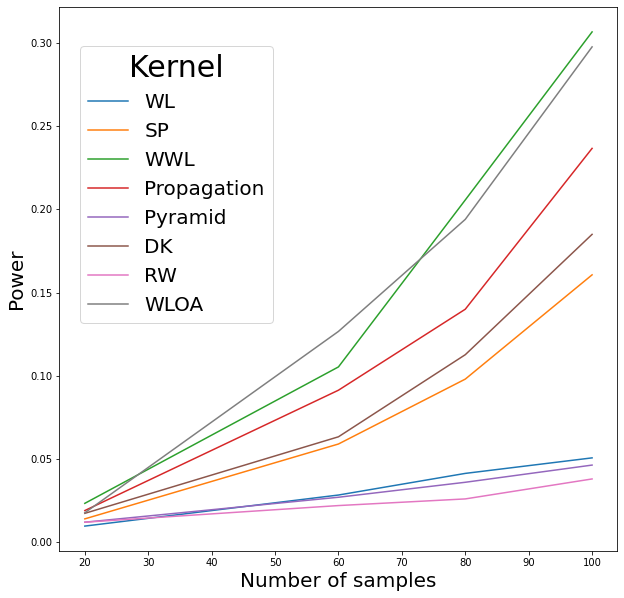

In [86]:
fig, ax = plt.subplots(1,1, figsize = (10, 10))
names  = ['WL', 'SP', 'WWL', 'Propagation', 'Pyramid', 'DK', 'RW', 'WLOA']
for idx, data_power in enumerate([WL_power, SP_power, WWL_power, PROP_power, PYRAMID_power, DK_power, RW_power, WLOA_power]):
    x = np.array(data_power['n'].loc[data_power['alpha'] == alphas[4]])
    y = np.array(data_power['MMD_u'].loc[data_power['alpha'] == alphas[4]])
    ind = np.argsort(x)
    ax.plot(x[ind],y[ind], label = names[idx])
ax.legend(title = 'Kernel', bbox_to_anchor=(0.4, 0.4), fontsize = 20, title_fontsize=30)
ax.set_xlabel('Number of samples', fontsize = 20)
ax.set_ylabel('Power', fontsize = 20)